<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

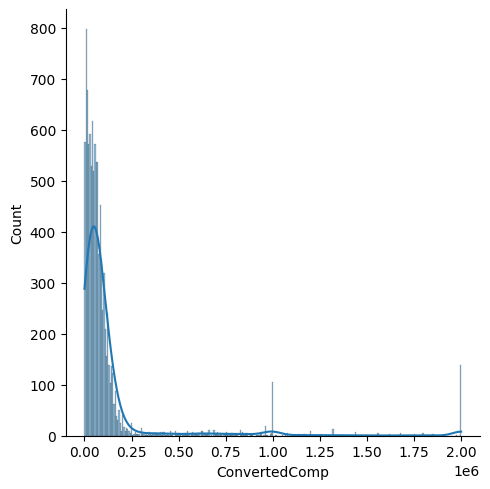

In [12]:
# your code goes here

sns.displot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.


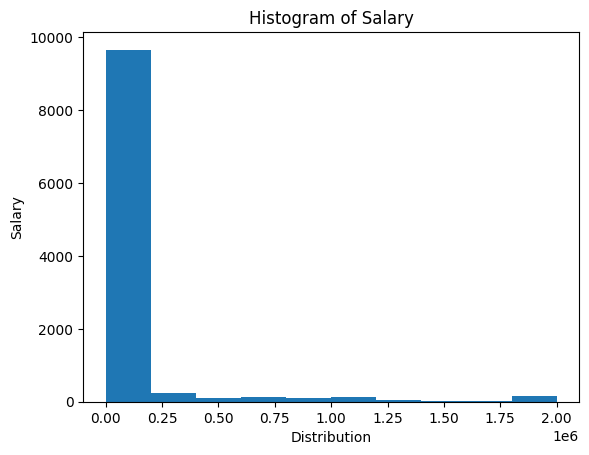

In [20]:
# your code goes here
import numpy as np
#count, bin_edges = np.histogram(df['ConvertedComp'])
df['ConvertedComp'].plot(kind='hist')
plt.title('Histogram of Salary')
plt.ylabel('Salary')
plt.xlabel('Distribution')
plt.show()

What is the median of the column `ConvertedComp`?


In [ ]:
df['ConvertedComp'].describe()

In [22]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [23]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [29]:
# your code goes here
df_woman = df[df['Gender'] == "Woman"]
df_woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [32]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

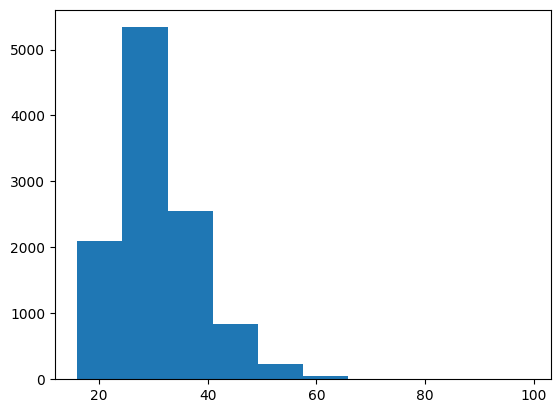

In [33]:
# your code goes here
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot: ylabel='ConvertedComp'>

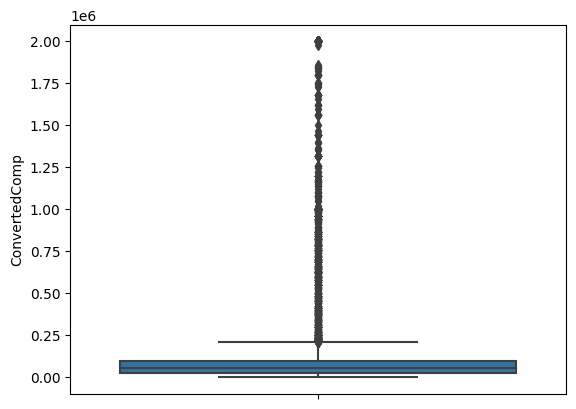

In [34]:
# your code goes here
sns.boxplot(y="ConvertedComp", data=df)

<AxesSubplot: ylabel='Age'>

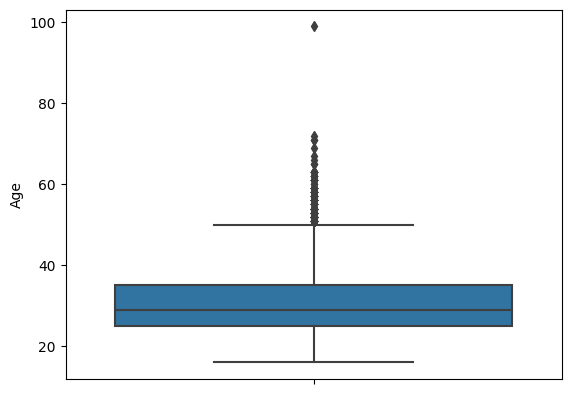

In [53]:
sns.boxplot(y="Age", data=df)

In [35]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [36]:
# your code goes here
df['ConvertedComp'].dropna(axis=0, inplace=True)
Q1,Q3 = df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR = Q3 - Q1
print('The Inter Quartile Range for ConvertedComp: ', IQR)

The Inter Quartile Range for ConvertedComp:  73132.0


Find out the upper and lower bounds.


In [37]:
# your code goes here
upper = Q3+(IQR*1.5)
lower = Q1-(IQR*1.5)

print('Upper bound: ', upper)
print('Lower bound: ', lower)

Upper bound:  209698.0
Lower bound:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
df_woman = df[df['Gender'] == "Woman"]

In [41]:
# your code goes here
outliers = df[df['ConvertedComp'] == (df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)]
outliers['ConvertedComp'].count()

26

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [69]:
# your code goes here
dfc = df[~(df['ConvertedComp'] > (Q3 + 1.5 * IQR))]

dfc['ConvertedComp'].describe()

count     10582.000000
mean      72327.661406
std       58619.926538
min           0.000000
25%       26868.000000
50%       57745.000000
75%      100000.000000
max      209698.000000
Name: ConvertedComp, dtype: float64

In [70]:
dfc.median()

Respondent       12484.0
CompTotal        65000.0
ConvertedComp    57745.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [72]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.007559,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,-0.024044,0.003510,0.007063,0.006970
ConvertedComp,0.007559,-0.024044,1.000000,0.040181,-0.075362,0.314283
WorkWeekHrs,-0.015314,0.003510,0.040181,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.075362,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.314283,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
